In [9]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import os
import re

In [22]:
pathDir = os.listdir('../result')

In [112]:
sorted(pathDir)

['dc-random-cluster-50-5.out',
 'dc-supervised-cluster-50-5.log',
 'dc-supervised-cluster-50-5.out',
 'dc-supervised-nlargest-50-5.log',
 'dc-supervised-nlargest-50-5.out',
 'dc-supervised-random-50-5.log',
 'dc-supervised-random-50-5.out',
 'dc-unsupervised-cluster-0-5.out',
 'dc-unsupervised-cluster-200-5.out',
 'dc-unsupervised-cluster-50-10.out',
 'dc-unsupervised-cluster-50-5.out',
 'dc-unsupervised-nlargest-50-5.out',
 'dc-unsupervised-random-50-5.out']

In [56]:
class OutputHandler():
    def __init__(self, filename, relative_dir='../result'):
        self.df = pd.read_csv(os.path.join(relative_dir, filename), sep=" ")
        self._parse_argument(filename)
    def _parse_argument(self, filename):
        self.target, self.learning_mode, self.add_mode, self.search_size, self.add_size, _ = re.split('-|\.', filename)

# comparison between different add mode for unsupervised active learning on dc

In [98]:
cluster_us = OutputHandler('dc-unsupervised-cluster-50-5.out')
nlargest_us = OutputHandler('dc-unsupervised-nlargest-50-5.out')
random_us = OutputHandler('dc-unsupervised-random-50-5.out')
random = OutputHandler('dc-random-cluster-50-5.out')
cluster_s = OutputHandler('dc-supervised-cluster-50-5.out')
random_s = OutputHandler('dc-supervised-random-50-5.out')
nlargest_s = OutputHandler('dc-supervised-nlargest-50-5.out')

all_oh = [cluster_us, nlargest_us, random_us, random, cluster_s, random_s, nlargest_s]

In [119]:
def plot_oh(oh, get_str, target='r2'): # oh==OutputHandler
    if oh.learning_mode == 'supervised':
        color = 'cornflowerblue'
    elif oh.learning_mode == 'random':
        color = 'grey'
    elif oh.learning_mode == 'unsupervised':
        color = 'orange'
    if oh.add_mode == 'cluster':
        linestyle = '-.'
    elif oh.add_mode == 'nlargest':
        linestyle = '--'
    elif oh.add_mode == 'random':
        linestyle = '-'
    #plt.scatter(oh.df['size'], oh.df[target], s=5, c=color)
    plt.plot(oh.df['size'], oh.df[target], c=color, linestyle=linestyle, label=get_str(oh))
    
def get_str(oh):
    return ('%s-%s' % (oh.learning_mode, oh.add_mode) )

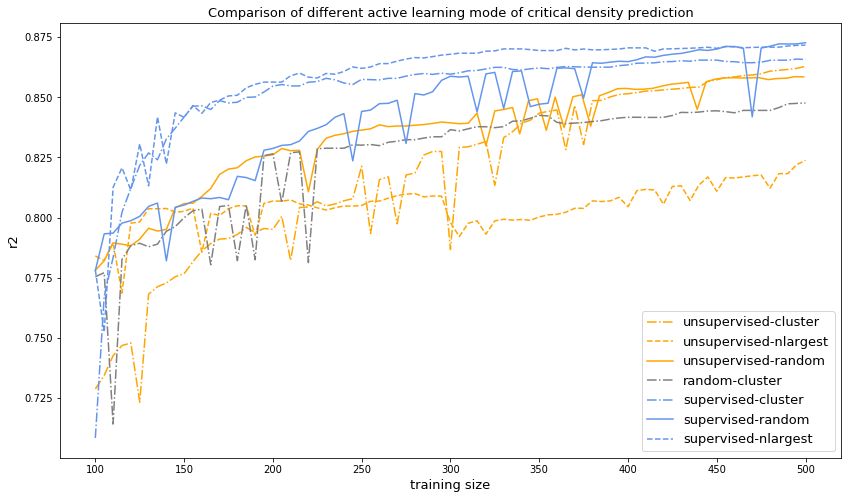

In [114]:
fig = plt.figure(figsize=(14,8))
for oh in all_oh:
    plot_oh(oh, get_str, 'r2')
fontsize = 13
plt.xlabel('training size', fontsize=fontsize)
plt.ylabel('r2', fontsize=fontsize)
plt.title('Comparison of different active learning mode of critical density prediction', fontsize=fontsize)
plt.legend(fontsize=fontsize)

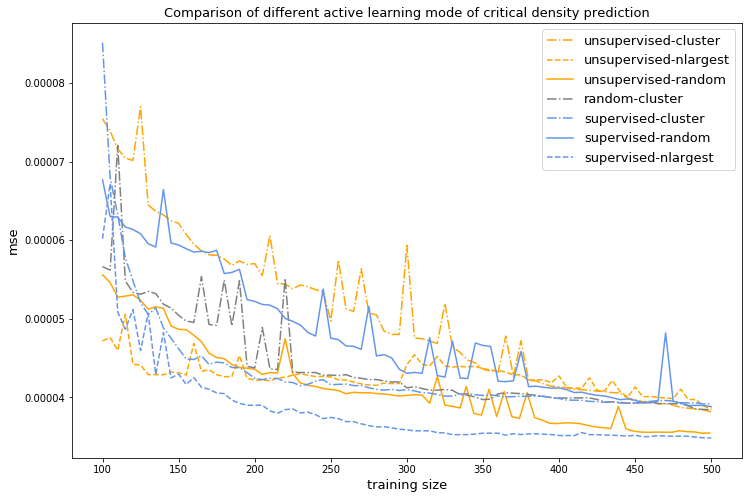

In [115]:
fig = plt.figure(figsize=(12,8))
for oh in all_oh:
    plot_oh(oh, 'mse')
fontsize = 13
plt.xlabel('training size', fontsize=fontsize)
plt.ylabel('mse', fontsize=fontsize)
plt.title('Comparison of different active learning mode of critical density prediction', fontsize=fontsize)
plt.legend(fontsize=fontsize)

# comparison for different search size for unsupervised

In [135]:
out_list =  ['dc-unsupervised-cluster-0-5.out', 'dc-unsupervised-cluster-200-5.out',
 'dc-unsupervised-cluster-50-5.out', 'dc-unsupervised-random-50-5.out']

In [136]:
oh_list = [OutputHandler(i) for i in out_list]

In [184]:
def plot_oh2(oh, get_str, target='r2'): # oh==OutputHandler
    if oh.add_mode == 'random':
        linestyle = '-'
    elif oh.add_mode == 'cluster':
        linestyle = '--'

    if oh.search_size == '0':
        color = 1
    else:
        color = int(oh.search_size)**0.5 / 20
    cmap=plt.get_cmap('autumn')
    plt.plot(oh.df['size'], oh.df[target], c=cmap(color), label=get_str(oh), linestyle=linestyle)
    
def get_str(oh):
    return ('%s-%s' % (oh.learning_mode, oh.add_mode) )

def get_str2(oh):
    return ('%s-search:%s-add:%s' % (oh.add_mode, oh.search_size, oh.add_size))

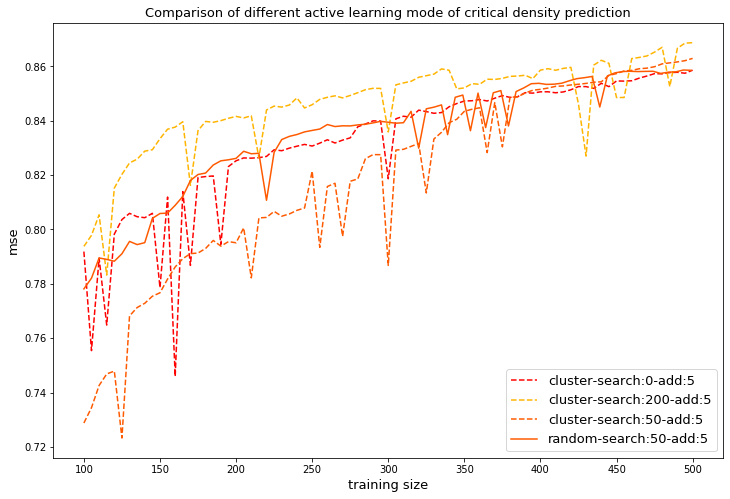

In [185]:
fig = plt.figure(figsize=(12,8))
for oh in oh_list:
    plot_oh2(oh, get_str2, 'r2')
fontsize = 13
plt.xlabel('training size', fontsize=fontsize)
plt.ylabel('mse', fontsize=fontsize)
plt.title('Comparison of different active learning mode of critical density prediction', fontsize=fontsize)
plt.legend(fontsize=fontsize)